### 1) Importando as bibliotecas e carregando os dados

In [5035]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5036]:
dados = pd.read_csv('base.csv')

In [5037]:
pd.set_option('display.max_columns', None)
dados.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5038]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

Eliminando coluna id e atribuindo as variáveis categóricas as devidas classificações

In [5039]:
dados.drop(columns='Id', inplace = True)
dados['BanheiroPorao'] = dados['BanheiroPorao'].astype('float')
dados['LavaboPorao'] = dados['LavaboPorao'].astype('float')
dados['Banheiro'] = dados['BanheiroPorao'].astype('float')
dados['Lavabo'] = dados['LavaboPorao'].astype('float')
dados['Banheiro'] = dados['BanheiroPorao'].astype('float')
dados['TotalQuartos'] = dados['TotalQuartos'].astype('float')
dados['Lareira'] = dados['Lareira'].astype('float')
dados['KitchenAbvGr'] = dados['KitchenAbvGr'].astype('float')
dados['BedroomAbvGr'] = dados['BedroomAbvGr'].astype('float')
dados['CarrosGaragem'] = dados['CarrosGaragem'].astype('float')

### 2) Análise exploratória dos dados

##### 2.1) Conferindo a distribuição da variável de interesse:

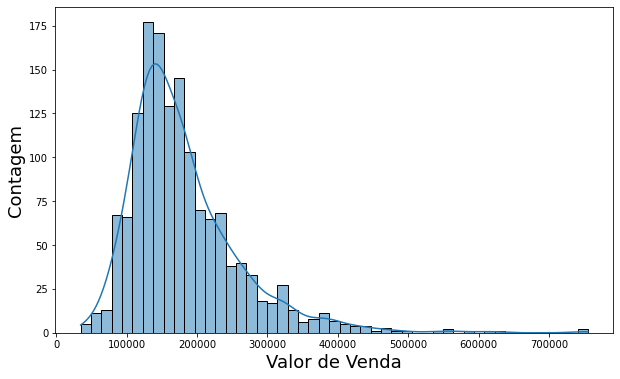

In [5040]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.histplot(data = dados, x = 'PrecoVenda', kde = True)
plt.ylabel('Contagem', fontsize = 18)
plt.xlabel('Valor de Venda', fontsize = 18);

Como podemos verificar no gráfico acima a variável valor de venda apresenta uma distribuição próxima da normal com uma cauda que se alonga para a direita.

##### 2.2) Contando o número de valores faltantes pra cada variável:

In [5041]:
df_null =(dados.isnull().sum()/len(dados))*100
df_null = df_null.drop(df_null[df_null == 0].index).sort_values(ascending=False)
df_null = pd.DataFrame({'pctg':df_null})
df_null

,pctg
QualidadePiscina,99.520548
Outros,96.301370
Beco,93.767123
QualidadeCerca,80.753425
QualdiadeLareira,47.260274
Fachada,17.739726
LocalGaragem,5.547945
AnoGaragem,5.547945
AcabamentoGaragem,5.547945
QualidadeGaragem,5.547945


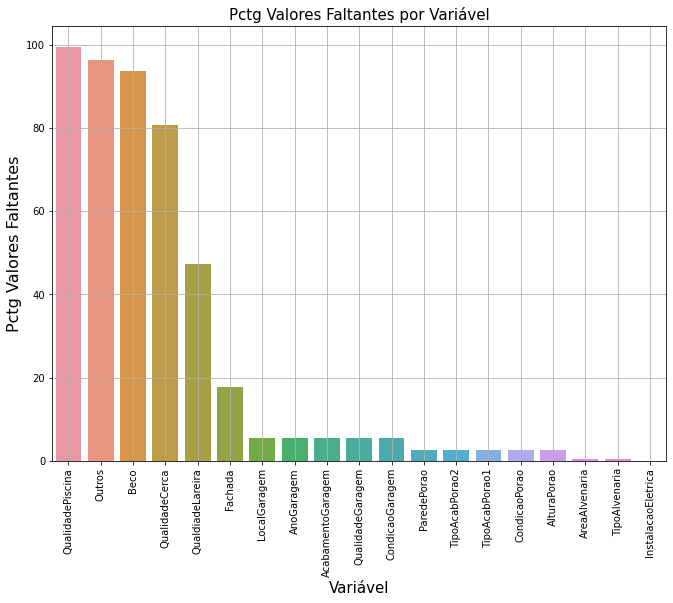

In [5042]:
fig, ax = plt.subplots(figsize = (11,8))
sns.barplot(x = df_null.index, y =df_null['pctg'])
plt.grid()
plt.title('Pctg Valores Faltantes por Variável', fontsize = 15)
plt.xlabel(xlabel='Variável', fontsize = 15)
plt.ylabel(ylabel = 'Pctg Valores Faltantes', fontsize = 16)
plt.xticks(rotation = '90');

##### 2.3) Matriz de correlação entre as variáveis contínuas:

In [5043]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = dados.select_dtypes(include=numerics)

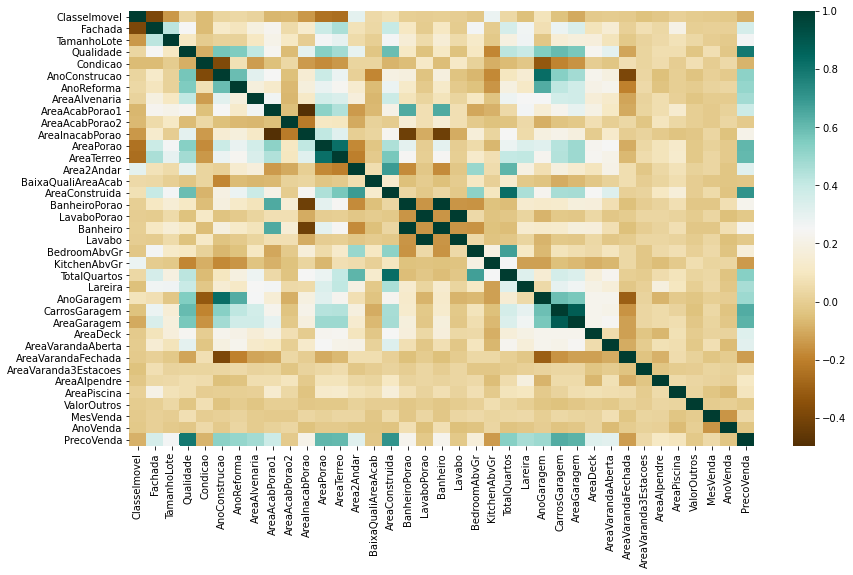

In [5044]:
corr = num_df.corr()
plt.subplots(figsize=(14,8))
sns.heatmap(corr, cmap = 'BrBG');

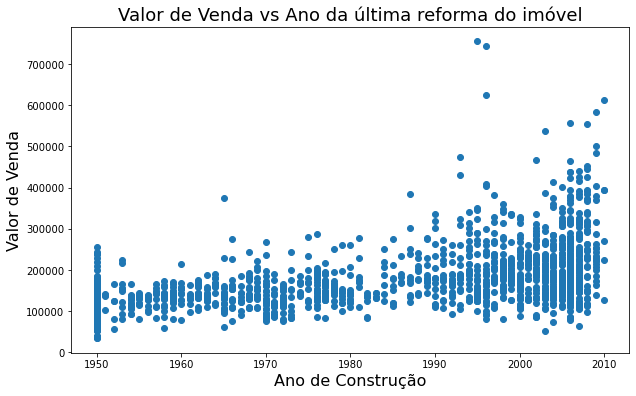

In [5045]:
plt.subplots(figsize=(10,6))
plt.scatter(data=dados, x = 'AnoReforma', y = 'PrecoVenda')
plt.title('Valor de Venda vs Ano da última reforma do imóvel', fontsize = 18)
plt.xlabel('Ano de Construção', fontsize = 16)
plt.ylabel('Valor de Venda', fontsize = 16);

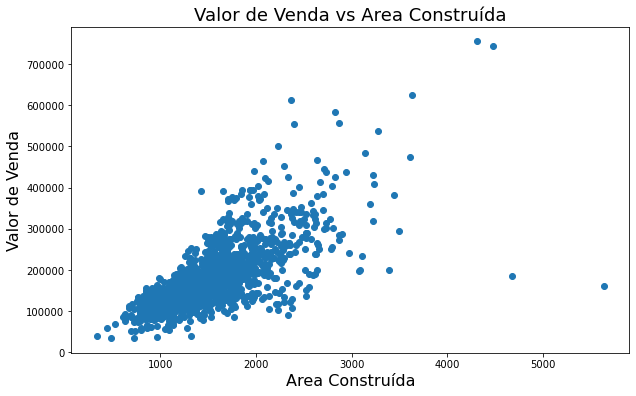

In [5046]:
plt.subplots(figsize=(10,6))
plt.scatter(data=dados, x = 'AreaConstruida', y = 'PrecoVenda')
plt.title('Valor de Venda vs Area Construída', fontsize = 18)
plt.xlabel('Area Construída', fontsize = 16)
plt.ylabel('Valor de Venda', fontsize = 16);

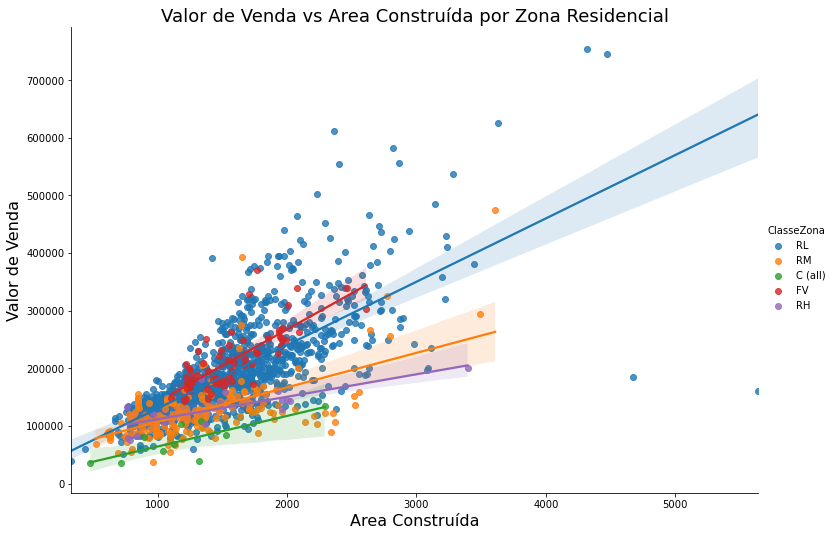

In [5047]:
sns.lmplot(data=dados, x = 'AreaConstruida', y = 'PrecoVenda', hue = 'ClasseZona', height = 7, aspect =1.5)
plt.title('Valor de Venda vs Area Construída por Zona Residencial', fontsize = 18)
plt.xlabel('Area Construída', fontsize = 16)
plt.ylabel('Valor de Venda', fontsize = 16);

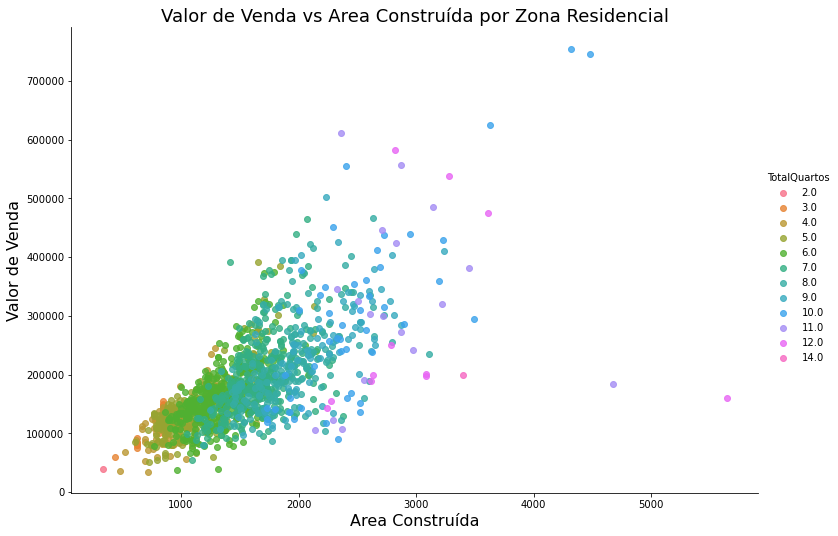

In [5048]:
sns.lmplot(data=dados, x = 'AreaConstruida', y = 'PrecoVenda', hue = 'TotalQuartos', height = 7, aspect =1.5, fit_reg=False)
plt.title('Valor de Venda vs Area Construída por Zona Residencial', fontsize = 18)
plt.xlabel('Area Construída', fontsize = 16)
plt.ylabel('Valor de Venda', fontsize = 16);

##### 2.4) Distribuição do valor de venda para as diferentes variáveis categóricas:

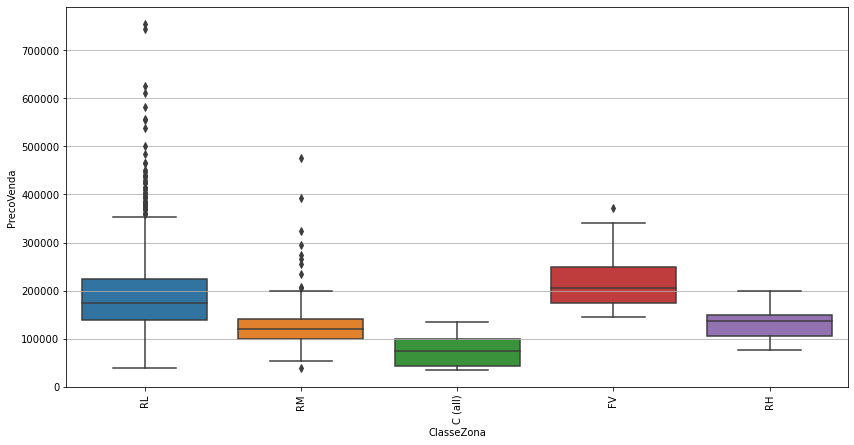

In [5049]:
plt.subplots(figsize = (14,7))
plt.grid()
sns.boxplot(data = dados, x = 'ClasseZona', y = 'PrecoVenda' )
plt.xticks(rotation = '90');

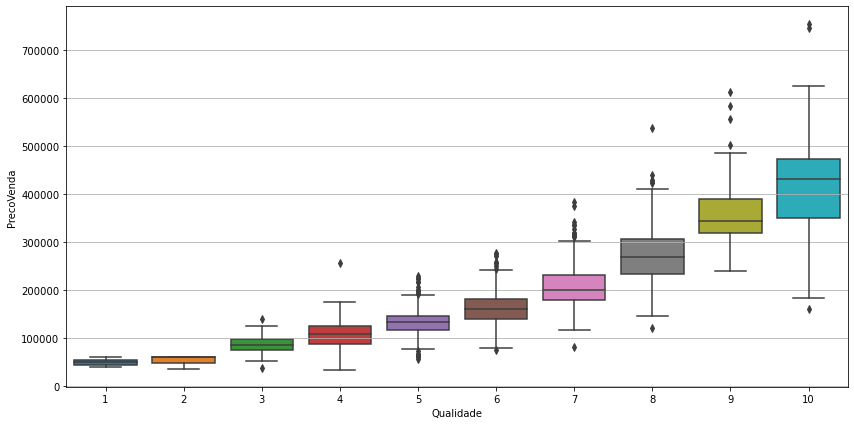

In [5050]:
plt.subplots(figsize = (14,7))
plt.grid()
sns.boxplot(data = dados, x = 'Qualidade', y = 'PrecoVenda' );

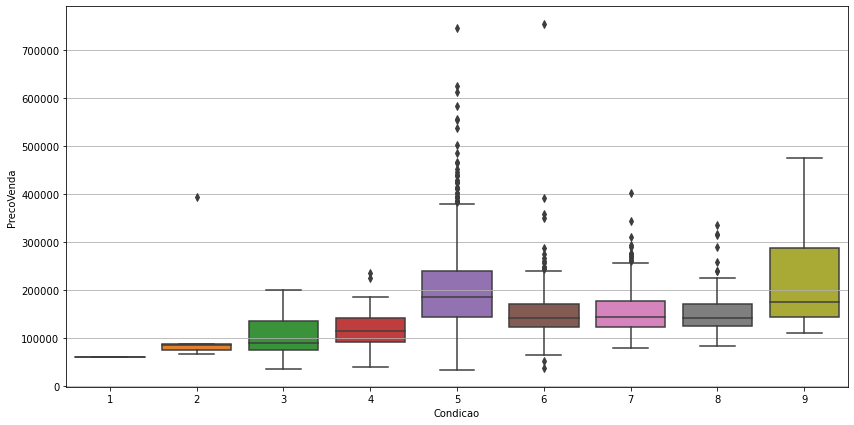

In [5051]:
plt.subplots(figsize = (14,7))
plt.grid()
sns.boxplot(data = dados, x = 'Condicao', y = 'PrecoVenda' );

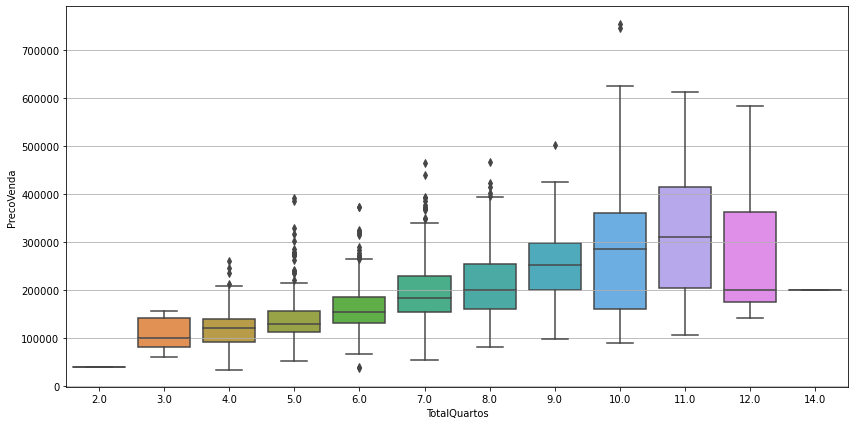

In [5052]:
plt.subplots(figsize = (14,7))
plt.grid()
sns.boxplot(data = dados, x = 'TotalQuartos', y = 'PrecoVenda' );

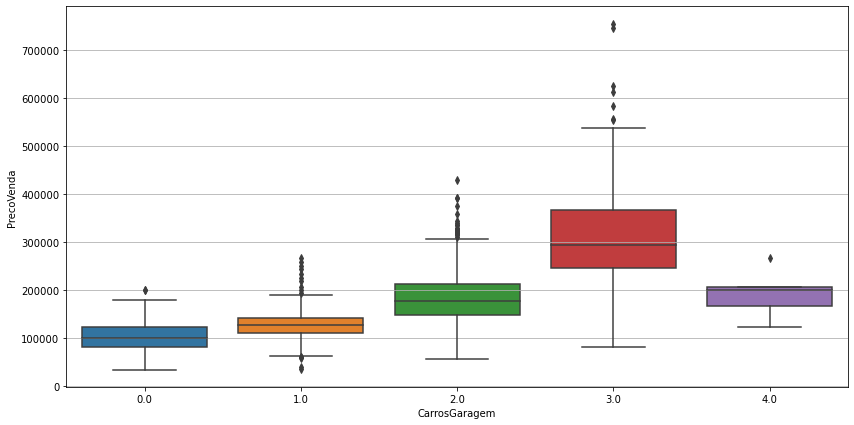

In [5053]:
plt.subplots(figsize = (14,7))
plt.grid()
sns.boxplot(data = dados, x = 'CarrosGaragem', y = 'PrecoVenda' );

##### 2.5) Conclusões após EDA

-  É possível concluir que o ano de construção dos imóveis tem correlação positiva com o preço de venda. Os imóveis mais novos em sua maioria dtem um preço de venda superior aos mais antigos. 
-  Outra variável contínua que se correlaciona com o preço de venda é a área construída do imóvel, o que é bem intuitivo dado que no mercado de imóveis a métrica mais utilizada é o valor do metro quadrado.
-  Entre as variáveis categóricas é possível observar dentro da classe do imóvel que há uma diferença de mais de 100 mil dólares entre a classe com maior e menor média, portanto essa tende a ser uma variável que vá influenciar bastante no modelo. Essa diferença é natural dado que há uma diferença considerável entre imóveis residenciais em áreas comerciais e em condomínios de luxo.
-  Qualidade e Condição são duas variáveis qualitativas ordinais que influenciam diretamente também no preço de venda do imóvel, o que é natural dado que as condições atuais do imóvel quanto se relacionam diretamente com o valor de venda do imóvel.
-  Uma variável quantitativa discreta que se correlaciona bastante com o preço de venda do imóvel é o total de quartos, porém é importante observar que essa é uma variável que deve se correlacionar fortemente com a área total do imóvel e pode gerar colinearidade no modelo.
-  Aparentemente temos dois outliers que tem uma área construída muito alta com e um preço de venda muito baixo, então na fase de pré-processamento vamos investiga-los melhor.
-  A condição da venda também influencia diretamente no valor da venda e há uma alta variação dentro das classes em relação ao valor da venda, nesse desafio na construção do modelo só usaremos vendas em condição 'normal'.
-  Por fim, outra variável quantitativa discreta é o número de vagas na garagem com uma diferença brutal de quase 200 mil reais entre quando há 3 vagas disponíveis na garagem e quando não há vagas.

### 3) Pré-processamento, limpeza e construção das features

#### 3.1) Tratando valores missing

Primeiro vamos eliminar todos as colunas com mais de 20 pct de valores faltantes já que elas não serão úteis na análise.

In [5054]:
df_null_mais20 = df_null[df_null['pctg'] > 20]
df_null_mais20.index

Index(['QualidadePiscina', 'Outros', 'Beco', 'QualidadeCerca',
       'QualdiadeLareira'],
      dtype='object')

In [5055]:
dados.drop(columns=df_null_mais20.index,inplace=True)

Para a variável fachada podemos usar como estimativa a mediana do bairro daquele imóvel para qual temos o valor missing

In [5056]:
dados['Fachada'] = dados.groupby('Bairro').transform(lambda x: x.fillna(x.median()))

Para a variáveis relacionadas a garagem, como podemos ver abaixo, os campos missing provavelmente são de casas que não tem garagem como vemos na coluna CarrosGaragem. Então vamos arrumas as outras colunas também.

In [5057]:
dados[['LocalGaragem','AnoGaragem','AcabamentoGaragem','CarrosGaragem','QualidadeGaragem','CondicaoGaragem']].loc[dados['CarrosGaragem'] == 0].head(10)

,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,QualidadeGaragem,CondicaoGaragem
39,NaN,NaN,NaN,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,NaN,NaN
88,NaN,NaN,NaN,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,NaN,NaN
99,NaN,NaN,NaN,0.0,NaN,NaN
108,NaN,NaN,NaN,0.0,NaN,NaN
125,NaN,NaN,NaN,0.0,NaN,NaN
127,NaN,NaN,NaN,0.0,NaN,NaN
140,NaN,NaN,NaN,0.0,NaN,NaN


In [5058]:
dados.LocalGaragem = dados.LocalGaragem.fillna('SemGaragem')
dados.AnoGaragem = dados.AnoGaragem.fillna('SemGaragem')
dados.AcabamentoGaragem = dados.AcabamentoGaragem.fillna('SemGaragem')
dados.QualidadeGaragem = dados.QualidadeGaragem.fillna('SemGaragem')
dados.CondicaoGaragem = dados.CondicaoGaragem.fillna('SemGaragem')

Como vemos no dicionário de dados os nulos indicam que não tem porão então vamos preenche-los como tal.

In [5059]:
dados.ParedePorao.fillna('SemPorao', inplace=True)
dados.TipoAcabPorao1.fillna('SemPorao', inplace=True)
dados.TipoAcabPorao2.fillna('SemPorao', inplace=True)
dados.AlturaPorao.fillna('SemPorao', inplace=True)
dados.CondicaoPorao.fillna('SemPorao', inplace=True)

Para alvenaria são muito poucos Nan (apenas aprox 0.5% dos dados), por isso vamos preencher com a principal classe que é None ou Area de Alvenaria = 0

In [5060]:
dados.TipoAlvenaria.describe()

count     1452
unique       4
top       None
freq       864
Name: TipoAlvenaria, dtype: object

In [5061]:
dados.TipoAlvenaria.fillna('None', inplace=True)
dados.AreaAlvenaria.fillna(0, inplace=True)

Para a variável "InstalacaoEletrica" a grande maioria dos valores é 'Sbrkr' ou como vemos no dicionário os dijuntores padrão, portanto vamos preenche-lo nos missing

In [5062]:
dados.InstalacaoEletrica.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: InstalacaoEletrica, dtype: object

In [5063]:
dados.InstalacaoEletrica.fillna('SBrkr', inplace=True)

Por fim, preenchemos todos valores missing que estavam no gráfico que plotamos anteriormente.

#### 3.2) Investigando Outliers

Anteriormente vimos que existe um outlier que tem uma área muito grande e valor de venda baixo, portanto vamos investiga-lo.

In [5064]:
dados.loc[(dados['AreaConstruida'] > 4000) & (dados['PrecoVenda'] < 200000)]

,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
523,60,RL,60.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,1.0,0.0,3.0,1.0,Ex,11.0,Typ,1.0,BuiltIn,2007.0,Fin,3.0,884,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750
1298,60,RL,60.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2.0,0.0,3.0,1.0,Ex,12.0,Typ,3.0,Attchd,2008.0,Fin,2.0,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000


Quando verificamos que a qualidade é 10 e já vimos que essa é a variável mais correlacionada com preço já indica que de fato temos um outlier, porém a condição da venda foi 'partial' o que pode indicar que foi uma venda de apenas uma porcentagem do imóvel. Não vamos remove-las portanto já que no modelo só usaremos os imóveis com CondicaoVenda normal. 

In [5065]:
#dados.drop(axis=0,index=dados.loc[(dados['AreaConstruida'] > 4000) & (dados['PrecoVenda'] < 200000)].index, inplace=True)

#### 3.3) Criando features

Uma feature interessante para se criar é a área por quarto, assim temos a dimensão de quão espaçosos são os quartos.

In [5066]:
dados['areaporquarto'] = dados['AreaConstruida']/dados['TotalQuartos']

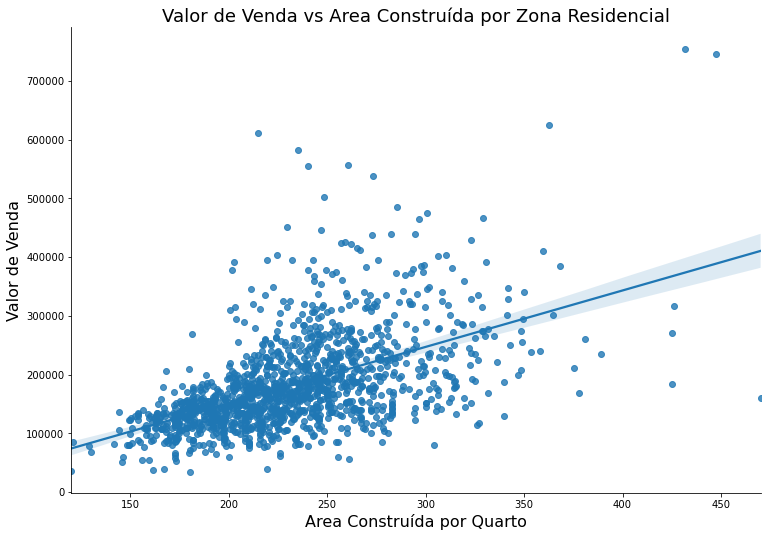

In [5067]:
sns.lmplot(data=dados, x = 'areaporquarto', y = 'PrecoVenda', height = 7, aspect =1.5)
plt.title('Valor de Venda vs Area Construída por Zona Residencial', fontsize = 18)
plt.xlabel('Area Construída por Quarto', fontsize = 16)
plt.ylabel('Valor de Venda', fontsize = 16);

Podemos ver que de fato a área construída por quarto se relaciona diretamente com o valor de venda do imóvel.

Outra variável que podemos criar para verificar a correlação é um indicador de qualidadevscondição, desta forma é possível captar as duas variáveis em uma nova.

In [5068]:
dados['qualcond'] = round((dados['Qualidade'] + dados['Condicao'])/2)

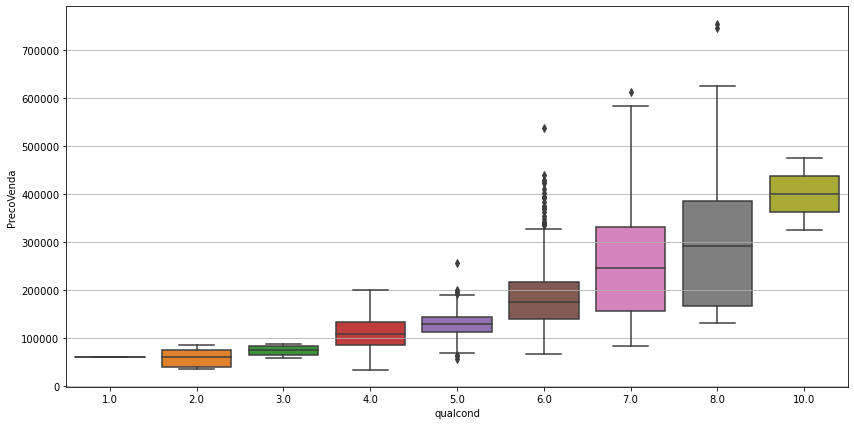

In [5069]:
plt.subplots(figsize = (14,7))
plt.grid()
sns.boxplot(data = dados, x = 'qualcond', y = 'PrecoVenda' );

Verificamos que de fato há bastante correlação entre a variável qualcond e a variável interesse preço de venda.

#### 3.4) Transformação na variável de interesse

Para começar vamos verificar a distribuição da varíavel de interesse (PrecoVenda) assim como sua QQ-Plot

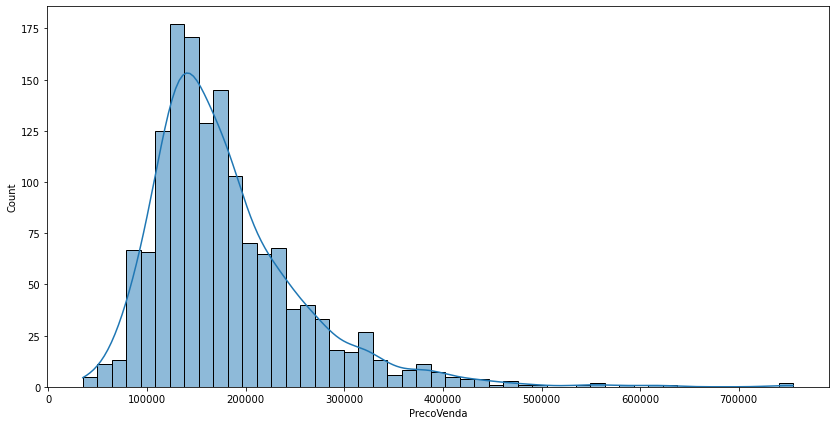

In [5070]:
plt.subplots(figsize = (14,7))
sns.histplot(dados['PrecoVenda'], kde=True);

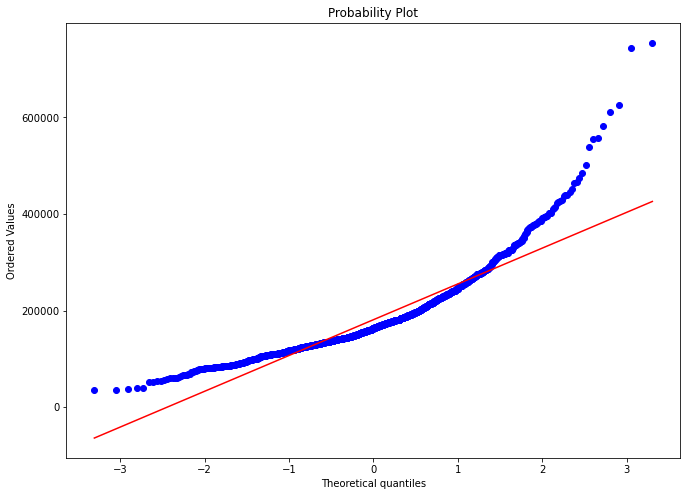

In [5071]:
from scipy import stats
fig = plt.figure()
fig.set_size_inches(11,8)
res = stats.probplot(dados['PrecoVenda'], plot = plt)
plt.show()

Podemos observar que a variável PrecoVenda tem uma distribuição similar a normal com uma cauda muito comprida pra direita, e isso influenciaria no nosso modelo por conta da escala. Então vamos aplicar uma transformação logarítmica na variável de forma a garantir que a nossa variável alvo tenha uma distribuição normal.

In [5072]:
dados_treino = pd.DataFrame()
dados_treino['PrecoVenda'] = np.log1p(dados['PrecoVenda'])

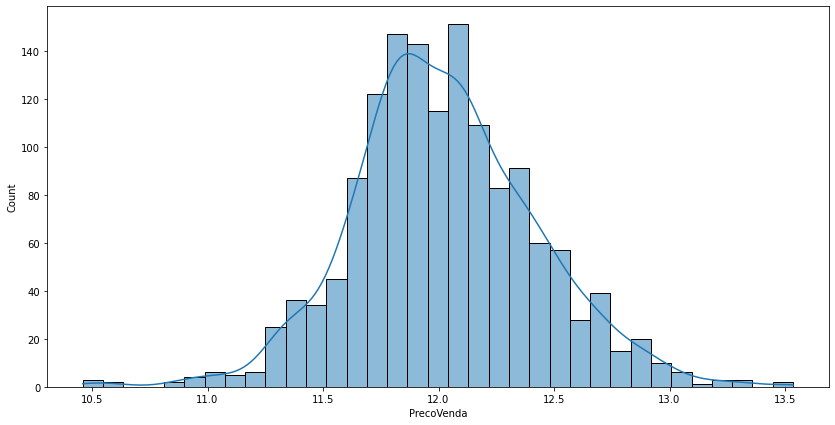

In [5073]:
plt.subplots(figsize = (14,7))
sns.histplot(dados_treino['PrecoVenda'], kde=True);

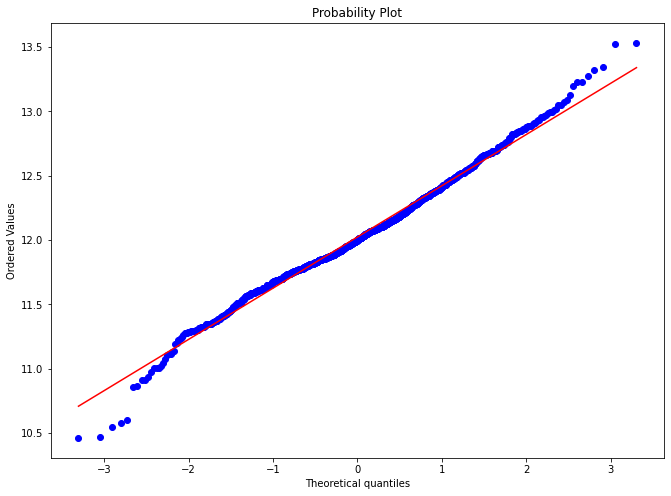

In [5074]:
fig = plt.figure()
fig.set_size_inches(11,8)
res = stats.probplot(dados_treino['PrecoVenda'], plot = plt)
plt.show()

Como podemos ver no novo QQ-Plot os pontos azuis se aproximam muito da reta vermelha, indicando que a distribuição após a transformação logarítmica é praticamente normal.

#### 3.5) Selecionando as features do modelo

Agora vamos selecionar seis features para o nosso modelo. A primeira vai ser a feature de area construida, que é a maior correlação com a variável alvo.

In [5075]:
dados_treino['AreaConstruida'] = dados['AreaConstruida']

Também vamos utilizar a nossa feature criada de area por quarto, que dá uma dimensão para o modelo de quão espaçosos são os quartos da casa.

In [5076]:
dados_treino['AreaporQuarto'] = dados['areaporquarto']

Outra variável vai ser a qualidade, que como vimos é uma das variáveis que mais se relaciona com o preco de venda e determina a qualidade do material usado na construção do imóvel.

In [5077]:
dados_treino['Qualidade'] = dados['Qualidade']

Vamos também utilizar a variável da classe do imóvel que aplica ao modelo a noção de localização do imóvel em relação a seu preço de venda.

In [5078]:
dados_treino['ClasseZona'] = dados['ClasseZona']

Vamos agora acrescenter a feature de Ano Reforma para acrescentar a dimensão de se o imóvel foi reformado recentemente ou não.

In [5079]:
dados_treino['AnoReforma'] = dados['AnoReforma']

E por fim, a condição do imóvel que nos diz se ele está em bom estado de conservação ou não.

In [5080]:
dados_treino['CarrosGaragem'] = dados['CarrosGaragem']

Agora temos que filtrar somente as vendas que foram feitas em condição normal, pois são essas que vamos criar o nosso modelo em cima.

In [5081]:
dados_treino['CondVenda'] = dados['CondicaoVenda']
dados_treino = dados_treino.loc[dados_treino['CondVenda'] == 'Normal'].drop(columns = 'CondVenda').reset_index(drop=True)

Por fim, temos nosso dataset pronto pra se aplicar as transformações

In [5082]:
dados_treino.head()

,PrecoVenda,AreaConstruida,AreaporQuarto,Qualidade,ClasseZona,AnoReforma,CarrosGaragem
0,12.247699,1710,213.750000,7,RL,2003,2.0
1,12.109016,1262,210.333333,6,RL,1976,2.0
2,12.317171,1786,297.666667,7,RL,2002,2.0
3,12.429220,2198,244.222222,8,RL,2000,3.0
4,11.870607,1362,272.400000,5,RL,1995,2.0


#### 3.6) Aplicando transformações nas features

Primeiramente vamos aplicar o OneHotEncoding a variável classezona que é a única categórica que usaremos em nossa regressão linear.

In [5083]:
categorical_cols = ['ClasseZona']

dados_treino = pd.get_dummies(dados_treino,columns = categorical_cols)

In [5084]:
dados_treino

,PrecoVenda,AreaConstruida,AreaporQuarto,Qualidade,AnoReforma,CarrosGaragem,ClasseZona_C (all),ClasseZona_FV,ClasseZona_RH,ClasseZona_RL,ClasseZona_RM
0,12.247699,1710,213.750000,7,2003,2.0,0,0,0,1,0
1,12.109016,1262,210.333333,6,1976,2.0,0,0,0,1,0
2,12.317171,1786,297.666667,7,2002,2.0,0,0,0,1,0
3,12.429220,2198,244.222222,8,2000,3.0,0,0,0,1,0
4,11.870607,1362,272.400000,5,1995,2.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1193,12.072547,1647,235.285714,6,2000,2.0,0,0,0,1,0
1194,12.254868,2073,296.142857,6,1988,2.0,0,0,0,1,0
1195,12.493133,2340,260.000000,7,2006,1.0,0,0,0,1,0
1196,11.864469,1078,215.600000,5,1996,1.0,0,0,0,1,0


Agora que temos nossa variável classezona encodada com o OneHotEncoding vamos partir pra padonização das nossas variáveis númericas, na qual usaremos a função StandardScaler do Sklearn.

In [5085]:
#from sklearn.preprocessing import StandardScaler
#features_scale = ['PrecoVenda','AreaConstruida','Qualidade','CarrosGaragem','AreaporQuarto','AnoReforma']
#dados_numericos = dados_treino[features_scale]
#dados_numericos

In [5086]:
#scaled_features = StandardScaler().fit_transform(dados_numericos.values)
#dados_regressao = pd.DataFrame(scaled_features,index=dados_numericos.index,columns=dados_numericos.columns)

In [5087]:
dados_regressao['ClasseZona_C (all)'] = dados_treino['ClasseZona_C (all)']
dados_regressao['ClasseZona_FV'] = dados_treino['ClasseZona_FV']
dados_regressao['ClasseZona_RH'] = dados_treino['ClasseZona_RH']
dados_regressao['ClasseZona_RL'] = dados_treino['ClasseZona_RL']
dados_regressao['ClasseZona_RM'] = dados_treino['ClasseZona_RM']

Por fim, temos o nosso dataframe com os dados transformados e prontos para nossa regressão.

In [5088]:
dados_regressao

,PrecoVenda,AreaConstruida,Qualidade,CarrosGaragem,AreaporQuarto,AnoReforma,ClasseZona_C (all),ClasseZona_FV,ClasseZona_RH,ClasseZona_RL,ClasseZona_RM
0,0.661701,0.437086,0.753863,0.388232,-0.373804,0.952089,0,0,0,1,0
1,0.283530,-0.465153,-0.005068,0.388232,-0.451896,-0.379987,0,0,0,1,0
2,0.851143,0.590145,0.753863,0.388232,1.544208,0.902753,0,0,0,1,0
3,1.156687,1.419883,1.512794,1.797632,0.322674,0.804080,0,0,0,1,0
4,-0.366583,-0.263761,-0.763999,0.388232,0.966709,0.557400,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1193,0.184083,0.310209,-0.005068,0.388232,0.118420,0.804080,0,0,0,1,0
1194,0.681249,1.168142,-0.005068,0.388232,1.509379,0.212047,0,0,0,1,0
1195,1.330970,1.705860,0.753863,-1.021168,0.683293,1.100097,0,0,0,1,0
1196,-0.383320,-0.835716,-0.763999,-1.021168,-0.331520,0.606736,0,0,0,1,0


### 4) Fittando a regressão linear

In [5089]:
import statsmodels.api as sm
x = dados_treino.drop(columns='PrecoVenda')
Y = dados_treino['PrecoVenda']
x=sm.add_constant(x)

In [5090]:
dados_treino.head(50)

,PrecoVenda,AreaConstruida,AreaporQuarto,Qualidade,AnoReforma,CarrosGaragem,ClasseZona_C (all),ClasseZona_FV,ClasseZona_RH,ClasseZona_RL,ClasseZona_RM
0,12.247699,1710,213.750000,7,2003,2.0,0,0,0,1,0
1,12.109016,1262,210.333333,6,1976,2.0,0,0,0,1,0
2,12.317171,1786,297.666667,7,2002,2.0,0,0,0,1,0
3,12.429220,2198,244.222222,8,2000,3.0,0,0,0,1,0
4,11.870607,1362,272.400000,5,1995,2.0,0,0,0,1,0
5,12.634606,1694,242.000000,8,2005,2.0,0,0,0,1,0
6,12.206078,2090,298.571429,7,1973,2.0,0,0,0,1,0
7,11.678448,1077,215.400000,5,1950,1.0,0,0,0,1,0
8,11.771444,1040,208.000000,5,1965,1.0,0,0,0,1,0
9,11.877576,912,228.000000,5,1962,1.0,0,0,0,1,0


In [5091]:
regressao = sm.OLS(Y,x).fit()

In [5092]:
regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PrecoVenda   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     759.2
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:18:30   Log-Likelihood:                 645.86
No. Observations:                1198   AIC:                            -1272.
Df Residuals:                    1188   BIC:                            -1221.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7631      0.386     12.328      0.000       4.005       5.521
AreaConstruida         0.0002   1.21e-05     18.846      0.000       0.000       0.000
AreaporQuarto          0.0007      0.000      5.909      0.000       0.000       0.001
Qualidade              0.1050      0.005     22.920      0.000       0.096       0.114
AnoReforma             0.0024      0.000     10.212      0.000       0.002       0.003
CarrosGaragem          0.0961      0.007     13.209      0.000       0.082       0.110
ClasseZona_C (all)     0.6738      0.096      7.008      0.000       0.485       0.862
ClasseZona_FV          1.0569      0.084     12.588      0.000       0.892       1.222
ClasseZona_RH          0.9658      0.084     11.442      0.000       0.800       1.131
ClasseZona_RL          1.1285      0.079     14.253      0.000       0.973       1.284
ClasseZona_RM          0.9381      0.079     11.854      0.000       0.783       1.093
==============================================================================
Omnibus:                       52.110   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.494
Skew:                          -0.357   Prob(JB):                     4.49e-19
Kurtosis:                       4.088   Cond. No.                     3.51e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.14e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

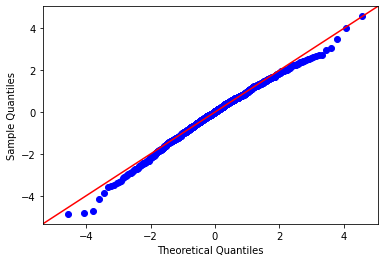

In [5093]:
res = regressao.resid
fig = sm.qqplot(res,stats.t,distargs=(4,), line = '45', fit=True)
plt.show()

In [5094]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False).reset_index(drop=True)


C:\Users\bruno\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\bruno\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,ClasseZona_C (all),inf
1,ClasseZona_FV,inf
2,ClasseZona_RH,inf
3,ClasseZona_RL,inf
4,ClasseZona_RM,inf
5,Qualidade,2.17
6,AreaConstruida,2.14
7,AreaporQuarto,1.82
8,CarrosGaragem,1.59
9,AnoReforma,1.40


O unico jeito que eu consegui um R2 abaixo de 0.85 foi aplicando uma padronização nos dados com o StandardScaler nos dados, inclusive na variavel alvo (depois da transformação logarítmica). Está certo aplicar a padronização a todas as variáveis dos dados ?

Só posso aplicar o onehotencoding quando as outras variáveis já foram padronizadas ? Quando tentei sem aplicar a padronização os VIFs das variáveis dummies ficavam muito mais altos.

### 5) Regressão por Random Forest

#### 5.1) Carregando o dataset

Carregando os dados novamente

In [5095]:
dados = pd.read_csv('base.csv').drop(columns='Id')

Aplicando a transformação logarítmica na nossa varíavel de interesse

In [5096]:
dados.PrecoVenda = np.log(dados.PrecoVenda)

Transformando a classe imóvel em uma varíavel categórica, já que apesar de ser número é uma classificação.

In [5097]:
dados.ClasseImovel = dados.ClasseImovel.astype('object')

#### 5.2) Preenchendo valores missing

Agora vamos preencher os valores faltantes das variáveis númericas com a mediana e os das variáveis categóricas com a moda.

In [5098]:
def preencher_missing(dataset):
    int_cols = list(dataset.select_dtypes('int64').columns)
    float_cols = list(dataset.select_dtypes('float64').columns)
    object_cols = list(dataset.select_dtypes('object').columns)

    for col in int_cols and float_cols:
        dataset[col].fillna(dataset[col].median(),inplace = True)

    for col in object_cols:
        dataset[col].fillna(dataset[col].mode()[0],inplace=True)

In [5099]:
preencher_missing(dados)

Agora é só conferir que não temos nenhum valor missing nos três datasets

In [5100]:
def contar_missing(dataset):
    dataset_null = (dataset.isnull().sum()/len(dataset))*100
    dataset_null = dataset_null.drop(dataset_null[dataset_null == 0].index).sort_values(ascending=False)
    dataset_null = pd.DataFrame({'pctg':dataset_null})
    print(dataset_null)

contar_missing(dados)

Empty DataFrame
Columns: [pctg]
Index: []


#### 5.3) Aplicando tranformações nas variáveis categóricas

In [5101]:
object_cols = list(dados.select_dtypes('object').columns)
ordinais = ['QualidadeCobertura','CondicaoExterna','AlturaPorao', 'CondicaoPorao','ParedePorao','InclinacaoLote','FormaProp','PlanoProp','TipoAcabPorao1','TipoAcabPorao2',
'QualidadeAquecimento','ArCentral','QualidadeCozinha','Funcionalidade','QualdiadeLareira','AcabamentoGaragem','QualidadeGaragem','CondicaoGaragem','EntradaPavimentada',
'QualidadePiscina','QualidadeCerca']
dados_ordinais = dados[ordinais]


In [5102]:
map1 = {'Ex':5, 'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA': 0}
map2 = { 'Gtl':2, 'Mod': 1 , 'Sev':0}
map3 = {'Reg':3, 'IR1':2,'IR2':1,'IR3':0}
map4 = {'Lvl':3,'Bnk':2,'HLS':1,'Low':0 }    
map5 = {'Ex':4, 'Gd':3,'TA':2,'Fa':1,'Po':0}
map6 = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0 }
map7 = { 'GLQ': 6, 'ALQ':5,'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1,'NA':0}
map8 = {'Y':1,'N':0}
map9 ={ 'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0}
map10= { 'Fin':3, 'RFn':2, 'Unf':1, 'NA':0 }
map11 = {'Y':2, 'P':1, 'N':0 }
map12 = {'Ex':4, 'Gd':3,'TA':2,'Fa':1, 'NA': 0}
map13 = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0 }

dados_ordinais_lista = [dados_ordinais]

for dataset in dados_ordinais_lista:
    dataset.FormaProp = dataset.FormaProp.map(map3)
    dataset.PlanoProp = dataset.PlanoProp.map(map4)
    dataset.CondicaoPorao = dataset.CondicaoPorao.map(map1)
    dataset.CondicaoExterna = dataset.CondicaoExterna.map(map5)
    dataset.QualidadeCobertura = dataset.QualidadeCobertura.map(map5)
    dataset.AlturaPorao = dataset.AlturaPorao.map(map1)
    dataset.ParedePorao = dataset.ParedePorao.map(map6)
    dataset.InclinacaoLote = dataset.InclinacaoLote.map(map2)
    dataset.TipoAcabPorao1 = dataset.TipoAcabPorao1.map(map7)
    dataset.TipoAcabPorao2 = dataset.TipoAcabPorao2.map(map7)
    dataset.QualidadeAquecimento = dataset.QualidadeAquecimento.map(map5)
    dataset.ArCentral = dataset.ArCentral.map(map8)
    dataset.QualidadeCozinha = dataset.QualidadeCozinha.map(map5)
    dataset.Funcionalidade = dataset.Funcionalidade.map(map9)
    dataset.QualdiadeLareira = dataset.QualdiadeLareira.map(map1)
    dataset.AcabamentoGaragem = dataset.AcabamentoGaragem.map(map10)
    dataset.QualidadeGaragem = dataset.QualidadeGaragem.map(map1)
    dataset.CondicaoGaragem = dataset.CondicaoGaragem.map(map1)
    dataset.EntradaPavimentada = dataset.EntradaPavimentada.map(map11)
    dataset.QualidadePiscina = dataset.QualidadePiscina.map(map12)
    dataset.QualidadeCerca = dataset.QualidadeCerca.map(map13)

C:\Users\bruno\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5103]:
dados_ordinais

,QualidadeCobertura,CondicaoExterna,AlturaPorao,CondicaoPorao,ParedePorao,InclinacaoLote,FormaProp,PlanoProp,TipoAcabPorao1,TipoAcabPorao2,QualidadeAquecimento,ArCentral,QualidadeCozinha,Funcionalidade,QualdiadeLareira,AcabamentoGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,QualidadePiscina,QualidadeCerca
0,3,2,4,3,1,2,3,3,6,1,4,1,3,7,4,2,3,3,2,3,3
1,2,2,4,3,4,2,3,3,5,1,4,1,2,7,3,2,3,3,2,3,3
2,3,2,4,3,2,2,2,3,6,1,4,1,3,7,3,2,3,3,2,3,3
3,2,2,3,4,1,2,2,3,5,1,3,1,3,7,4,1,3,3,2,3,3
4,3,2,4,3,3,2,2,3,6,1,4,1,3,7,3,2,3,3,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,2,4,3,1,2,3,3,1,1,4,1,2,7,3,2,3,3,2,3,3
1456,2,2,4,3,1,2,3,3,5,3,2,1,2,6,3,1,3,3,2,3,3
1457,4,3,3,4,1,2,3,3,6,1,4,1,3,7,4,2,3,3,2,3,4
1458,2,2,3,3,2,2,3,3,6,3,3,1,3,7,4,1,3,3,2,3,3


In [5104]:
object_cols.append('ClasseImovel')

In [5105]:
ints = list(dados.select_dtypes('int64').columns)
floats = list(dados.select_dtypes('float64').columns)
numericas = ints + floats
dados_numericas = dados[numericas].drop(columns='ClasseImovel')

In [5106]:
dados_numericas

,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,Fachada,AreaAlvenaria,AnoGaragem,PrecoVenda
0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,65.0,196.0,2003.0,12.247694
1,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,80.0,0.0,1976.0,12.109011
2,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,68.0,162.0,2001.0,12.317167
3,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,60.0,0.0,1998.0,11.849398
4,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,84.0,350.0,2000.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,62.0,0.0,1999.0,12.072541
1456,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,85.0,119.0,1978.0,12.254863
1457,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,66.0,0.0,1941.0,12.493130
1458,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,68.0,0.0,1950.0,11.864462


In [5107]:
categoricas = [x for x in object_cols if x not in ordinais]
dados_categoricas = dados[categoricas]

In [1152]:
dados_categoricas

,ClasseZona,Rua,Beco,Servicos,ConfigLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,TipoFundacao,Aquecimento,InstalacaoEletrica,LocalGaragem,Outros,TipoVenda,CondicaoVenda,ClasseImovel
0,RL,Pave,Grvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Shed,WD,Normal,60
1,RL,Pave,Grvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,Shed,WD,Normal,20
2,RL,Pave,Grvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Shed,WD,Normal,60
3,RL,Pave,Grvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,Shed,WD,Abnorml,70
4,RL,Pave,Grvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Shed,WD,Normal,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Attchd,Shed,WD,Normal,60
1456,RL,Pave,Grvl,AllPub,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,GasA,SBrkr,Attchd,Shed,WD,Normal,20
1457,RL,Pave,Grvl,AllPub,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Stone,GasA,SBrkr,Attchd,Shed,WD,Normal,70
1458,RL,Pave,Grvl,AllPub,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,CBlock,GasA,FuseA,Attchd,Shed,WD,Normal,20


In [1153]:
df_dummies = pd.get_dummies(dados_categoricas,columns = categoricas)

In [5108]:
dados = pd.concat([dados_numericas,dados_ordinais,df_dummies], axis = 1)
dados

,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,Fachada,AreaAlvenaria,AnoGaragem,PrecoVenda,QualidadeCobertura,CondicaoExterna,AlturaPorao,CondicaoPorao,ParedePorao,InclinacaoLote,FormaProp,PlanoProp,TipoAcabPorao1,TipoAcabPorao2,QualidadeAquecimento,ArCentral,QualidadeCozinha,Funcionalidade,QualdiadeLareira,AcabamentoGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,QualidadePiscina,QualidadeCerca,ClasseZona_C (all),ClasseZona_FV,ClasseZona_RH,ClasseZona_RL,ClasseZona_RM,Rua_Grvl,Rua_Pave,Beco_Grvl,Beco_Pave,Servicos_AllPub,Servicos_NoSeWa,ConfigLote_Corner,ConfigLote_CulDSac,ConfigLote_FR2,ConfigLote_FR3,ConfigLote_Inside,Bairro_Blmngtn,Bairro_Blueste,Bairro_BrDale,Bairro_BrkSide,Bairro_ClearCr,Bairro_CollgCr,Bairro_Crawfor,Bairro_Edwards,Bairro_Gilbert,Bairro_IDOTRR,Bairro_MeadowV,Bairro_Mitchel,Bairro_NAmes,Bairro_NPkVill,Bairro_NWAmes,Bairro_NoRidge,Bairro_NridgHt,Bairro_OldTown,Bairro_SWISU,Bairro_Sawyer,Bairro_SawyerW,Bairro_Somerst,Bairro_StoneBr,Bairro_Timber,Bairro_Veenker,Estrada1_Artery,Estrada1_Feedr,Estrada1_Norm,Estrada1_PosA,Estrada1_PosN,Estrada1_RRAe,Estrada1_RRAn,Estrada1_RRNe,Estrada1_RRNn,Estrada2_Artery,Estrada2_Feedr,Estrada2_Norm,Estrada2_PosA,Estrada2_PosN,Estrada2_RRAe,Estrada2_RRAn,Estrada2_RRNn,TipoHabitacao_1Fam,TipoHabitacao_2fmCon,TipoHabitacao_Duplex,TipoHabitacao_Twnhs,TipoHabitacao_TwnhsE,EstiloHabitacao_1.5Fin,EstiloHabitacao_1.5Unf,EstiloHabitacao_1Story,EstiloHabitacao_2.5Fin,EstiloHabitacao_2.5Unf,EstiloHabitacao_2Story,EstiloHabitacao_SFoyer,EstiloHabitacao_SLvl,TipoTelhado_Flat,TipoTelhado_Gable,TipoTelhado_Gambrel,TipoTelhado_Hip,TipoTelhado_Mansard,TipoTelhado_Shed,MaterialTelhado_ClyTile,MaterialTelhado_CompShg,MaterialTelhado_Membran,MaterialTelhado_Metal,MaterialTelhado_Roll,MaterialTelhado_Tar&Grv,MaterialTelhado_WdShake,MaterialTelhado_WdShngl,Exterior1_AsbShng,Exterior1_AsphShn,Exterior1_BrkComm,Exterior1_BrkFace,Exterior1_CBlock,Exterior1_CemntBd,Exterior1_HdBoard,Exterior1_ImStucc,Exterior1_MetalSd,Exterior1_Plywood,Exterior1_Stone,Exterior1_Stucco,Exterior1_VinylSd,Exterior1_Wd Sdng,Exterior1_WdShing,Exterior2_AsbShng,Exterior2_AsphShn,Exterior2_Brk Cmn,Exterior2_BrkFace,Exterior2_CBlock,Exterior2_CmentBd,Exterior2_HdBoard,Exterior2_ImStucc,Exterior2_MetalSd,Exterior2_Other,Exterior2_Plywood,Exterior2_Stone,Exterior2_Stucco,Exterior2_VinylSd,Exterior2_Wd Sdng,Exterior2_Wd Shng,TipoAlvenaria_BrkCmn,TipoAlvenaria_BrkFace,TipoAlvenaria_None,TipoAlvenaria_Stone,TipoFundacao_BrkTil,TipoFundacao_CBlock,TipoFundacao_PConc,TipoFundacao_Slab,TipoFundacao_Stone,TipoFundacao_Wood,Aquecimento_Floor,Aquecimento_GasA,Aquecimento_GasW,Aquecimento_Grav,Aquecimento_OthW,Aquecimento_Wall,InstalacaoEletrica_FuseA,InstalacaoEletrica_FuseF,InstalacaoEletrica_FuseP,InstalacaoEletrica_Mix,InstalacaoEletrica_SBrkr,LocalGaragem_2Types,LocalGaragem_Attchd,LocalGaragem_Basment,LocalGaragem_BuiltIn,LocalGaragem_CarPort,LocalGaragem_Detchd,Outros_Gar2,Outros_Othr,Outros_Shed,Outros_TenC,TipoVenda_COD,TipoVenda_CWD,TipoVenda_Con,TipoVenda_ConLD,TipoVenda_ConLI,TipoVenda_ConLw,TipoVenda_New,TipoVenda_Oth,TipoVenda_WD,CondicaoVenda_Abnorml,CondicaoVenda_AdjLand,CondicaoVenda_Alloca,CondicaoVenda_Family,CondicaoVenda_Normal,CondicaoVenda_Partial,ClasseImovel_20,ClasseImovel_30,ClasseImovel_40,ClasseImovel_45,ClasseImovel_50,ClasseImovel_60,ClasseImovel_70,ClasseImovel_75,ClasseImovel_80,ClasseImovel_85,ClasseImovel_90,ClasseImovel_120,ClasseImovel_160,ClasseImovel_180,ClasseImovel_190
0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,65.0,196.0,2003.0,12.247694,3,2,4,3,1,2,3,3,6,1,4,1,3,7,4,2,3,3,2,3,3,0,

#### 5.4) Separando o dataset em teste, treino e validação

In [5109]:
y = dados.PrecoVenda
X = dados.drop(columns='PrecoVenda')

In [5110]:
X

,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,Fachada,AreaAlvenaria,AnoGaragem,QualidadeCobertura,CondicaoExterna,AlturaPorao,CondicaoPorao,ParedePorao,InclinacaoLote,FormaProp,PlanoProp,TipoAcabPorao1,TipoAcabPorao2,QualidadeAquecimento,ArCentral,QualidadeCozinha,Funcionalidade,QualdiadeLareira,AcabamentoGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,QualidadePiscina,QualidadeCerca,ClasseZona_C (all),ClasseZona_FV,ClasseZona_RH,ClasseZona_RL,ClasseZona_RM,Rua_Grvl,Rua_Pave,Beco_Grvl,Beco_Pave,Servicos_AllPub,Servicos_NoSeWa,ConfigLote_Corner,ConfigLote_CulDSac,ConfigLote_FR2,ConfigLote_FR3,ConfigLote_Inside,Bairro_Blmngtn,Bairro_Blueste,Bairro_BrDale,Bairro_BrkSide,Bairro_ClearCr,Bairro_CollgCr,Bairro_Crawfor,Bairro_Edwards,Bairro_Gilbert,Bairro_IDOTRR,Bairro_MeadowV,Bairro_Mitchel,Bairro_NAmes,Bairro_NPkVill,Bairro_NWAmes,Bairro_NoRidge,Bairro_NridgHt,Bairro_OldTown,Bairro_SWISU,Bairro_Sawyer,Bairro_SawyerW,Bairro_Somerst,Bairro_StoneBr,Bairro_Timber,Bairro_Veenker,Estrada1_Artery,Estrada1_Feedr,Estrada1_Norm,Estrada1_PosA,Estrada1_PosN,Estrada1_RRAe,Estrada1_RRAn,Estrada1_RRNe,Estrada1_RRNn,Estrada2_Artery,Estrada2_Feedr,Estrada2_Norm,Estrada2_PosA,Estrada2_PosN,Estrada2_RRAe,Estrada2_RRAn,Estrada2_RRNn,TipoHabitacao_1Fam,TipoHabitacao_2fmCon,TipoHabitacao_Duplex,TipoHabitacao_Twnhs,TipoHabitacao_TwnhsE,EstiloHabitacao_1.5Fin,EstiloHabitacao_1.5Unf,EstiloHabitacao_1Story,EstiloHabitacao_2.5Fin,EstiloHabitacao_2.5Unf,EstiloHabitacao_2Story,EstiloHabitacao_SFoyer,EstiloHabitacao_SLvl,TipoTelhado_Flat,TipoTelhado_Gable,TipoTelhado_Gambrel,TipoTelhado_Hip,TipoTelhado_Mansard,TipoTelhado_Shed,MaterialTelhado_ClyTile,MaterialTelhado_CompShg,MaterialTelhado_Membran,MaterialTelhado_Metal,MaterialTelhado_Roll,MaterialTelhado_Tar&Grv,MaterialTelhado_WdShake,MaterialTelhado_WdShngl,Exterior1_AsbShng,Exterior1_AsphShn,Exterior1_BrkComm,Exterior1_BrkFace,Exterior1_CBlock,Exterior1_CemntBd,Exterior1_HdBoard,Exterior1_ImStucc,Exterior1_MetalSd,Exterior1_Plywood,Exterior1_Stone,Exterior1_Stucco,Exterior1_VinylSd,Exterior1_Wd Sdng,Exterior1_WdShing,Exterior2_AsbShng,Exterior2_AsphShn,Exterior2_Brk Cmn,Exterior2_BrkFace,Exterior2_CBlock,Exterior2_CmentBd,Exterior2_HdBoard,Exterior2_ImStucc,Exterior2_MetalSd,Exterior2_Other,Exterior2_Plywood,Exterior2_Stone,Exterior2_Stucco,Exterior2_VinylSd,Exterior2_Wd Sdng,Exterior2_Wd Shng,TipoAlvenaria_BrkCmn,TipoAlvenaria_BrkFace,TipoAlvenaria_None,TipoAlvenaria_Stone,TipoFundacao_BrkTil,TipoFundacao_CBlock,TipoFundacao_PConc,TipoFundacao_Slab,TipoFundacao_Stone,TipoFundacao_Wood,Aquecimento_Floor,Aquecimento_GasA,Aquecimento_GasW,Aquecimento_Grav,Aquecimento_OthW,Aquecimento_Wall,InstalacaoEletrica_FuseA,InstalacaoEletrica_FuseF,InstalacaoEletrica_FuseP,InstalacaoEletrica_Mix,InstalacaoEletrica_SBrkr,LocalGaragem_2Types,LocalGaragem_Attchd,LocalGaragem_Basment,LocalGaragem_BuiltIn,LocalGaragem_CarPort,LocalGaragem_Detchd,Outros_Gar2,Outros_Othr,Outros_Shed,Outros_TenC,TipoVenda_COD,TipoVenda_CWD,TipoVenda_Con,TipoVenda_ConLD,TipoVenda_ConLI,TipoVenda_ConLw,TipoVenda_New,TipoVenda_Oth,TipoVenda_WD,CondicaoVenda_Abnorml,CondicaoVenda_AdjLand,CondicaoVenda_Alloca,CondicaoVenda_Family,CondicaoVenda_Normal,CondicaoVenda_Partial,ClasseImovel_20,ClasseImovel_30,ClasseImovel_40,ClasseImovel_45,ClasseImovel_50,ClasseImovel_60,ClasseImovel_70,ClasseImovel_75,ClasseImovel_80,ClasseImovel_85,ClasseImovel_90,ClasseImovel_120,ClasseImovel_160,ClasseImovel_180,ClasseImovel_190
0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,65.0,196.0,2003.0,3,2,4,3,1,2,3,3,6,1,4,1,3,7,4,2,3,3,2,3,3,0,0,0,1,0,0,1,1,0,1,0,0

In [5111]:
feature_list = list(dados.columns)

In [5112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.3,random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test , test_size= 0.5,random_state=42)

#### 5.5) Criando um modelo de regressão linear baseline

Vamos fazer uma regressão somente entre a área construída e o valor de venda pra obter uma previsão baseline para nosso modelo random forest.

In [5113]:
X = X_train['AreaConstruida']
y = y_train
X = sm.add_constant(X)
olsmod = sm.OLS(y,X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:             PrecoVenda   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     886.7
Date:                Wed, 02 Feb 2022   Prob (F-statistic):          1.01e-140
Time:                        00:18:32   Log-Likelihood:                -177.84
No. Observations:                1022   AIC:                             359.7
Df Residuals:                    1020   BIC:                             369.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.2553      0.028    409.

In [5114]:
X_pred = X_test['AreaConstruida'].to_numpy()
X_pred = sm.add_constant(X_pred)
y_pred = olsres.predict(X_pred)
y_test = np.exp(y_test)
y_pred = np.exp(y_pred)
baseline_errors = abs(y_pred - y_test)
baseline_errors = pd.DataFrame(baseline_errors)
print(f'Erro médio da nossa regressão baseline (Em reais): {round(np.mean(baseline_errors),2)}');

Erro médio da nossa regressão baseline (Em reais): PrecoVenda    39551.32
dtype: float64


Agora vamos fazer uma função e plotar um gráfico com nossas previsões vs os valores reais.

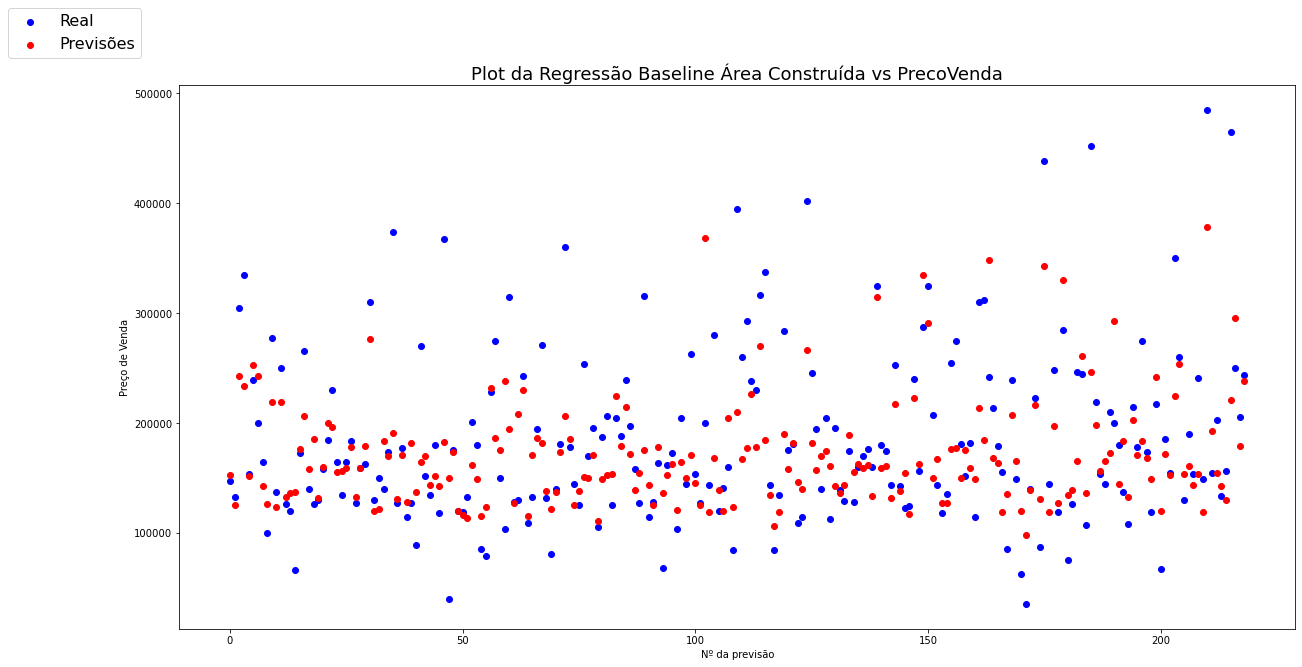

In [5115]:
def plotComparacao(y_test,y_pred,nomedaregressao):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    fig, ax = plt.subplots()
    fig.set_size_inches(20,10)   
    plt.scatter(range(len(y_test)), y_test, color = 'blue')
    plt.scatter(range(len(y_pred)), y_pred, color = 'red')
    plt.title(nomedaregressao, fontsize = 18)
    plt.xlabel('Nº da previsão')
    plt.ylabel('Preço de Venda')
    fig.legend(labels = ('Real','Previsões'),loc='upper left', fontsize = 16)
    plt.show()
    return

plotComparacao(y_test,y_pred,'Plot da Regressão Baseline Área Construída vs PrecoVenda')

Vamos calcular também o erro quadrático médio (RMSE):

In [5116]:
from sklearn.metrics import mean_squared_error 
import math
print(f'RMSE:{math.sqrt(mean_squared_error(y_test,y_pred))}')

RMSE:58191.245905443306


In [5117]:
from sklearn.metrics import r2_score
print(f'R²:{math.sqrt(r2_score(y_test,y_pred))}')

R²:0.6788821824983343


#### 5.6) Regressão Random Forest

In [5118]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10)
regressor.fit(X_train,y_train)
y_pred = np.exp(regressor.predict(X_test))
erro = abs(y_pred - y_test)
print(f'Erro médio da nossa primeira regressão random forest é (Em reais): {round(np.mean(erro),2)}');

Erro médio da nossa primeira regressão random forest é (Em reais): 18268.15


Portanto já reduzimos em mais de 21 mil reais o erro médio da nossa regressão com random forest em relação ao nosso modelo baseline da regressão Área vs PrecoVenda. Logo, estamos indo pelo caminho certo. Agora vamos tentar alterar os hiperparâmetros do nosso modelo e reduzir ainda mais esse erro médio. 

In [5119]:
regressor = RandomForestRegressor(n_estimators=30)
regressor.fit(X_train,y_train)
y_pred = np.exp(regressor.predict(X_test))
erro = abs(y_pred - y_test)
print(f'Erro médio da nossa segunda regressão random forest é (Em reais): {round(np.mean(erro),2)}');

Erro médio da nossa segunda regressão random forest é (Em reais): 16956.33


In [5120]:
regressor = RandomForestRegressor(n_estimators=50)
regressor.fit(X_train,y_train)
y_pred = np.exp(regressor.predict(X_test))
erro = abs(y_pred - y_test)
print(f'Erro médio da nossa terceira regressão random forest é (Em reais): {round(np.mean(erro),2)}');

Erro médio da nossa terceira regressão random forest é (Em reais): 16790.6


Agora nosso modelo parou de reduzir o erro. Vamos tentar achar qual n_estimators aproximadamente reduz o erro antes de mexer em outros hiperparametros.

In [5121]:
regressor = RandomForestRegressor(n_estimators=40)
regressor.fit(X_train,y_train)
y_pred = np.exp(regressor.predict(X_test))
erro = abs(y_pred - y_test)
print(f'Erro médio da nossa quarta regressão random forest é (Em reais): {round(np.mean(erro),2)}');

Erro médio da nossa quarta regressão random forest é (Em reais): 16533.01


Incluindo somente o hiperparâmetro max_features melhoramos o nosso modelo.

In [5122]:
regressor = RandomForestRegressor(n_estimators=40, max_features=np.sqrt(0.1))
regressor.fit(X_train,y_train)
y_pred = np.exp(regressor.predict(X_test))
erro = abs(y_pred - y_test)
print(f'Erro médio da nossa quinta regressão random forest é (Em reais): {round(np.mean(erro),2)}');

Erro médio da nossa quinta regressão random forest é (Em reais): 16052.87


Acrescentando o hiperparâmetro min_samples leaf na sexta regressão conseguimos chegar ao menor erro médio do nosso modelo, que vamos considerar como a versão final dele.

In [5123]:
regressor = RandomForestRegressor(n_estimators=40, max_features=np.sqrt(0.1), min_samples_leaf=1)
regressor.fit(X_train,y_train)
y_pred = np.exp(regressor.predict(X_test))
erro = abs(y_pred - y_test)
print(f'Erro médio da nossa sexta regressão random forest é (Em reais): {round(np.mean(erro),2)}');

Erro médio da nossa sexta regressão random forest é (Em reais): 16243.41


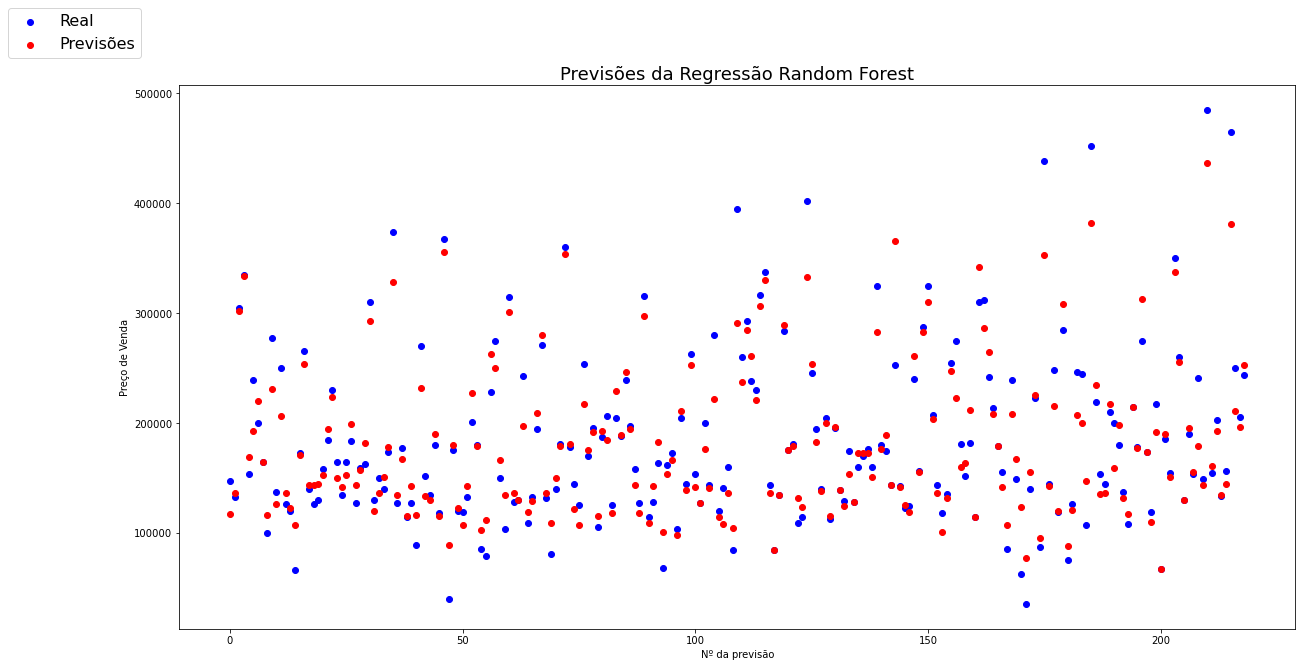

In [5124]:
plotComparacao(y_test,y_pred,'Previsões da Regressão Random Forest')

In [5125]:
print(f'RMSE:{math.sqrt(mean_squared_error(y_test,y_pred))}')

RMSE:24367.61789748099


In [5126]:
print(f'R²:{math.sqrt(r2_score(y_test,y_pred))}')

R²:0.9515589223993639


Vimos então como nosso erro quadrático médio caiu de 58 mil no baseline para 24 mil no modelo final e o erro médio absoluto caiu de quase 40 mil reais no baseline para menos de 16 mil reais no modelo final, fazendo somente o uso do modelo de regressão random forest e a otimização de alguns dos seus hiperparâmetros. Por fim, vamos utilizar a permutation importance para verificar a importância de cada feature.

In [5127]:
from sklearn.inspection import permutation_importance

importancia = permutation_importance(regressor, X_test, y_test, scoring ='neg_mean_squared_error')
importancia = importancia.importances_mean
importancia_lista = []
for indice, valor in enumerate(importancia):
    importancia_lista.append([indice,valor])
    print('Feature: %0d, Score: %.5f' % (indice,valor))

Feature: 0, Score: 2412.31992
Feature: 1, Score: 16372.52186
Feature: 2, Score: 293.66490
Feature: 3, Score: 1787.94330
Feature: 4, Score: 441.18659
Feature: 5, Score: 3550.39182
Feature: 6, Score: 8.60977
Feature: 7, Score: 19.54730
Feature: 8, Score: 3030.73538
Feature: 9, Score: 3805.82525
Feature: 10, Score: 1476.38100
Feature: 11, Score: 0.62363
Feature: 12, Score: 13378.82957
Feature: 13, Score: 310.47414
Feature: 14, Score: -1.98746
Feature: 15, Score: 1269.49944
Feature: 16, Score: 97.98060
Feature: 17, Score: 446.94638
Feature: 18, Score: -69.81244
Feature: 19, Score: 656.81734
Feature: 20, Score: 607.75698
Feature: 21, Score: 1551.61828
Feature: 22, Score: 3399.72276
Feature: 23, Score: -84.53654
Feature: 24, Score: 262.82972
Feature: 25, Score: -56.30930
Feature: 26, Score: 8.65520
Feature: 27, Score: 33.69589
Feature: 28, Score: -14.22524
Feature: 29, Score: 7.10089
Feature: 30, Score: 128.34978
Feature: 31, Score: 34.36382
Feature: 32, Score: 398.02124
Feature: 33, Score: 

In [5128]:
df_importancia = pd.DataFrame(importancia_lista, columns = ['n', 'importancia'])
df_importancia_top40 = df_importancia.sort_values(by = 'importancia', ascending=False).head(40)

In [5129]:
array_indices = df_importancia_top40.n.values
lista_indices = []
for i in array_indices:
    lista_indices.append(i)

In [5130]:
X_train_top40 = X_train.iloc[:,lista_indices]
X_test_top40 = X_test.iloc[:,lista_indices]

In [5175]:
X_train_top40.head(5)

,Qualidade,AreaConstruida,AlturaPorao,AreaTerreo,AreaAcabPorao1,AreaGaragem,AreaPorao,AnoGaragem,TamanhoLote,QualidadeCobertura,QualidadeCozinha,AnoConstrucao,CarrosGaragem,Area2Andar,Banheiro,LocalGaragem_Detchd,TotalQuartos,Lareira,QualidadeAquecimento,BedroomAbvGr,AnoReforma,Fachada,AreaAlvenaria,ClasseZona_RL,BanheiroPorao,Condicao,AcabamentoGaragem,AreaVarandaAberta,ClasseZona_RM,Estrada1_Norm,ParedePorao,PlanoProp,InclinacaoLote,TipoVenda_WD,MesVenda,TipoAcabPorao1,TipoHabitacao_1Fam,Exterior2_VinylSd,Lavabo,FormaProp
135,7,1682,3,1682,0,530,1304,1970.0,10400,2,2,1970,2,0,2,0,7,1,3,3,1970,80.0,288.0,1,0,6,1,0,0,1,1,3,2,1,5,1,1,0,0,3
1452,5,1072,4,1072,547,525,547,2005.0,3675,2,2,2005,2,0,1,0,5,0,3,2,2005,35.0,80.0,0,1,5,3,28,1,1,4,3,2,1,5,6,0,1,0,3
762,7,1547,4,764,24,614,756,2009.0,8640,2,3,2009,2,783,2,0,7,0,4,3,2009,72.0,0.0,0,0,5,1,45,0,1,2,3,2,0,6,6,1,1,1,3
932,9,1905,5,1905,0,788,1905,2006.0,11670,4,4,2006,3,0,2,0,8,1,4,3,2006,84.0,302.0,1,0,5,3,191,0,0,1,3,2,1,3,1,1,0,0,2
435,7,1661,4,827,385,550,799,1996.0,10667,3,3,1996,2,834,2,0,6,1,4,3,1996,43.0,0.0,1,1,6,2,61,0,0,3,3,2,0,4,6,1,1,1,1


In [5171]:
regressor = RandomForestRegressor(n_estimators=120, max_features=np.sqrt(0.1), min_samples_leaf=1)
regressor.fit(X_train_top40,y_train)
y_pred = np.exp(regressor.predict(X_test_top40))
erro = abs(y_pred - y_test)
print(f'Erro médio da nossa sétima regressão random forest é (Em reais): {round(np.mean(erro),2)}');

Erro médio da nossa sétima regressão random forest é (Em reais): 15401.51


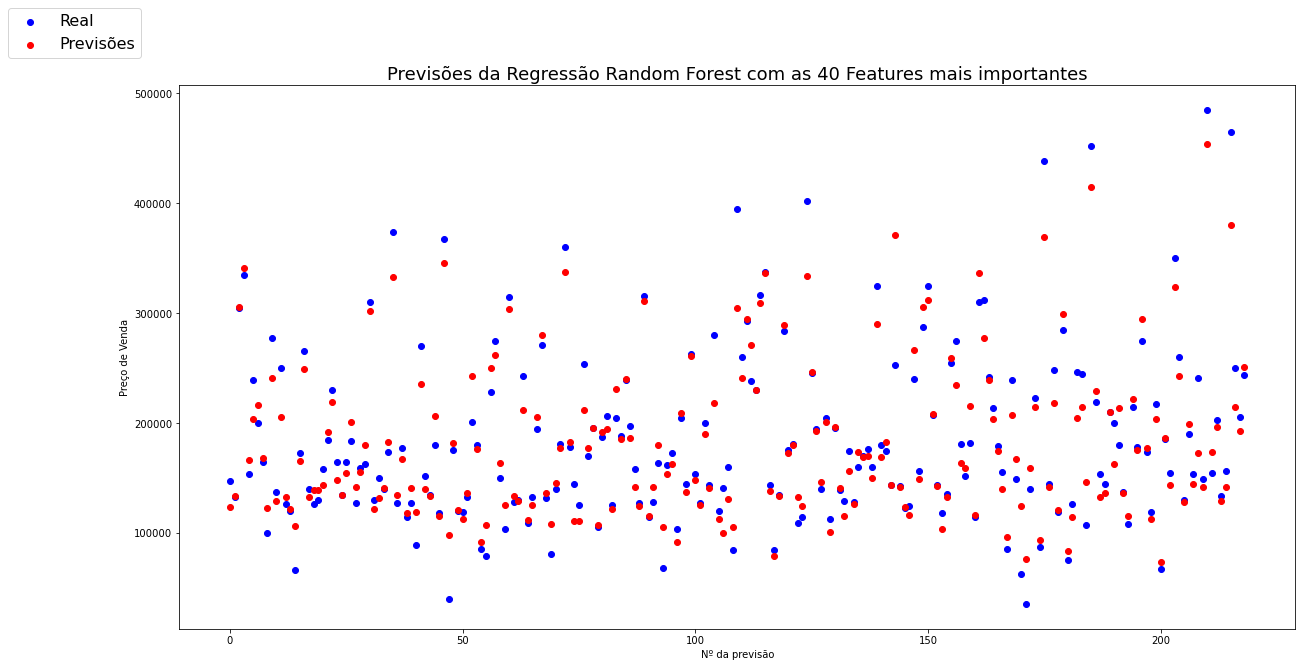

In [5172]:
plotComparacao(y_test,y_pred,'Previsões da Regressão Random Forest com as 40 Features mais importantes')

In [5173]:
print(f'RMSE:{math.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R²:{math.sqrt(r2_score(y_test,y_pred))}')

RMSE:23129.877371032584
R²:0.9564644524473618


Portanto, com menos features no nosso modelo, o que otimiza a performance, conseguimos reduzir ainda mais o erro médio da nossa regressão.Chegamos a um r² de 0.956 e um erro médio quadrático de 23129 indicando que nosso treinamento com a regressão random forest e a seleção pela importância das 40 maiores features.

### 6) Conclusão

Por fim, podemos concluir que conseguimos um modelo muito mais eficiente em relação ao nosso modelo baseline através da regressão random forest com tuning dos hiperparâmetros. Nosso r² final ficou em 0.956 com um erro médio absoluto de apenas 15.400 reais e um erro médio quadrático de 23.129

Outro ponto que podemos observar visualmente na evolução do nosso modelo foi que ocorreu principalmente uma adaptação aos outliers que veio com as features acrescentadas na regressão random_forest que geraram robustez ao modelo. Inclusive o modelo baseline não foi tão ruim assim já que gerou um r² de quase 0.5 somente com uma variável, que por sinal inclusive era a segunda no nosso ranking de importância.

Por fim, uma observação curiosa é que ao verificarmos a importância das features nos deparamos com algumas que não esperaríamos por nossa intuição no top dez como altura do porão, área do porão e qualidade da cozinha. Isso ocorre pois de fato os modelos são treinados para verificar essas sensibilidades nos dados que em princípio uma análise superficial humana não seria capaz de reparar.   